In [1]:
import tensorflow as tf
import numpy as np
%pylab inline
import random

/Users/siddharthnayak/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Populating the interactive namespace from numpy and matplotlib


In [2]:
xIn,yIn = np.loadtxt("twoDimData.dat",unpack = True)

In [3]:
x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)
W=tf.Variable(tf.random_uniform(shape = [1],minval = 0,maxval = 100))
b=tf.Variable(tf.random_uniform(shape=[1],minval=-100,maxval=100))
with tf.name_scope('WX_b') as scope:
    y_predicted=W*x+b
with tf.name_scope('Cost_function') as scope:
    loss=tf.reduce_mean(tf.square(y_predicted-y))
    tf.summary.scalar('loss',loss)
    

In [4]:
#For visualization in tensorboard
W_h=tf.summary.histogram('weights',W)
b_h=tf.summary.histogram('Bias',b)

In [5]:
lr=2e-6#learning rate
with tf.name_scope('Optimizer') as scope:
    optimizer=tf.train.GradientDescentOptimizer(lr).minimize(loss)

In [6]:
# Initialize the session and variables

init = tf.global_variables_initializer()
merged_summary_op=tf.summary.merge_all()

# The graph of the model
For using Tensorboard check the path of the `summary_writer` in the next cell.<br/> 
Then type `--logdir /Users/siddharthnayak/Downloads/logs` in the terminal(in this case else type the path to the logdir).<br/> 
Then go to `localhost:6006` on your browser.

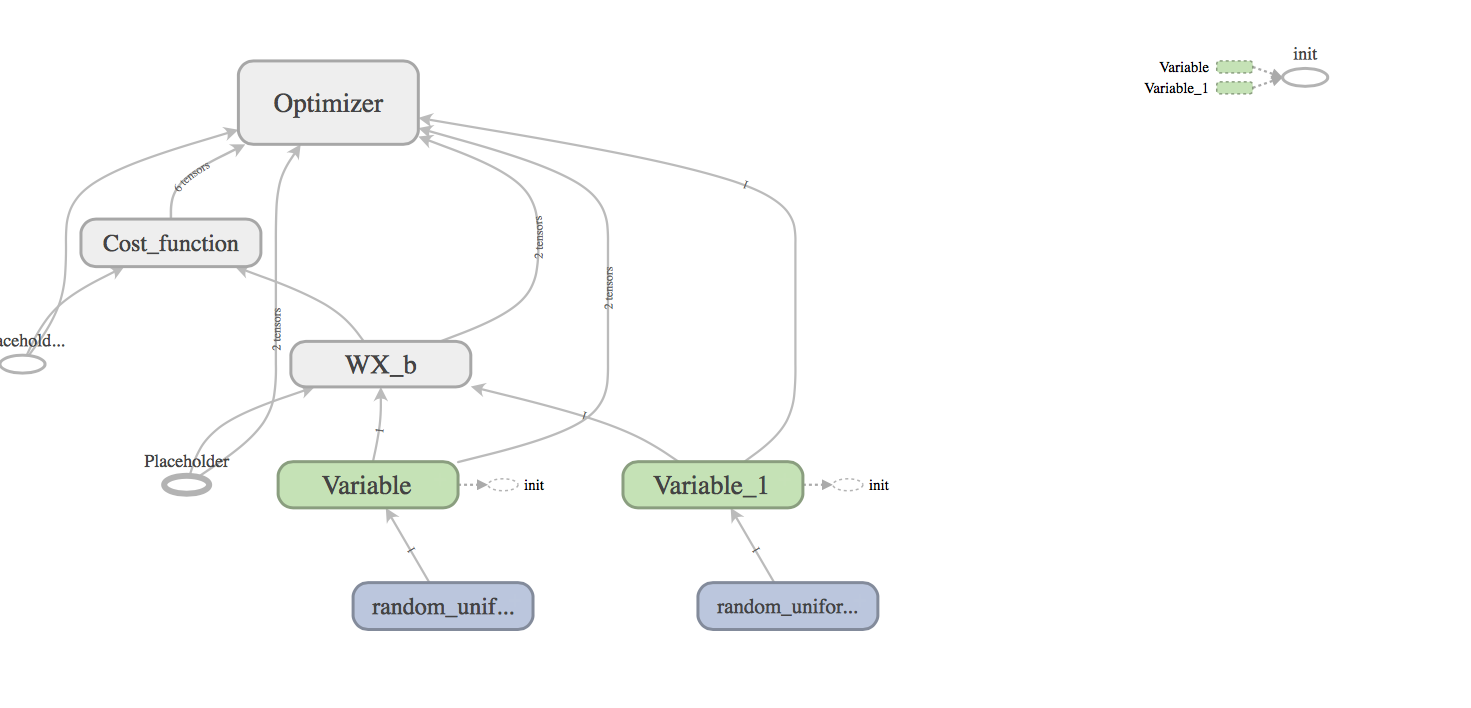

In [8]:
from IPython.display import Image
Image(filename='/Users/siddharthnayak/Downloads/graph?large_attrs_key=_too_large_attrs&limit_attr_size=1024&run=.png')

In [7]:
EPOCHS=10000
with tf.Session() as sess:
    sess.run(init)
    summary_writer=tf.summary.FileWriter('/Users/siddharthnayak/Downloads/logs',graph=sess.graph)#path to write tensorboard stuff
    for i in range(EPOCHS+1):
        avg_cost=0.
        sess.run(optimizer,feed_dict={x:xIn, y:yIn})
        m = sess.run(W)
        c = sess.run(b)
        l = sess.run(loss,feed_dict={x:xIn, y:yIn})
        summary_str=sess.run(merged_summary_op,feed_dict={x:xIn,y:yIn})
        summary_writer.add_summary(summary_str,i)
        if i%1000==0:
            print(i,l)
        

0 1.86392e+07
1000 524.87
2000 524.765
3000 524.66
4000 524.555
5000 524.45
6000 524.345
7000 524.24
8000 524.135
9000 524.031
10000 523.926


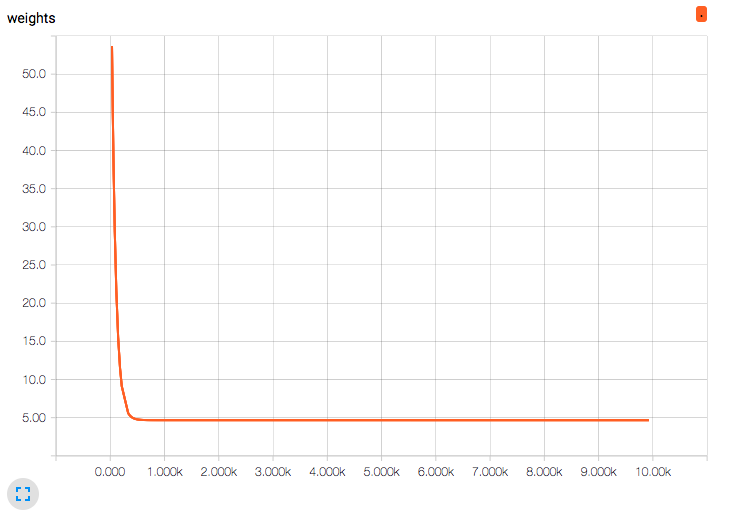

In [9]:
from IPython.display import Image
Image(filename='/Users/siddharthnayak/Desktop/Screen Shot 2018-03-19 at 1.51.40 AM.png')


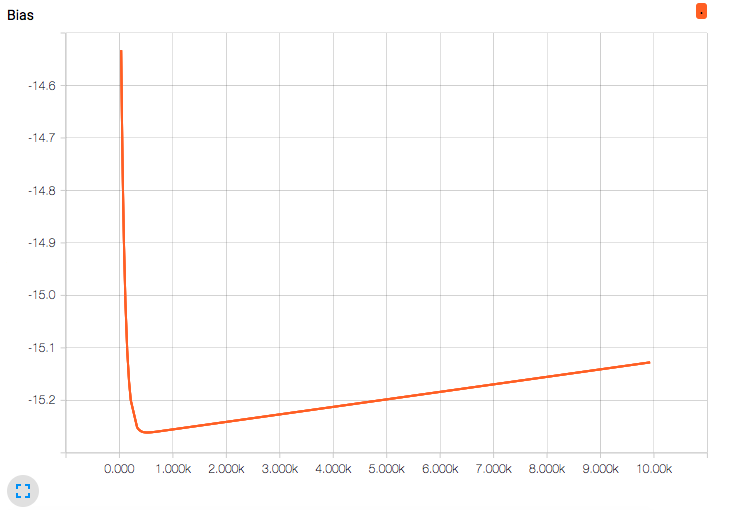

In [10]:
from IPython.display import Image
Image(filename='/Users/siddharthnayak/Desktop/Screen Shot 2018-03-19 at 1.51.50 AM.png')

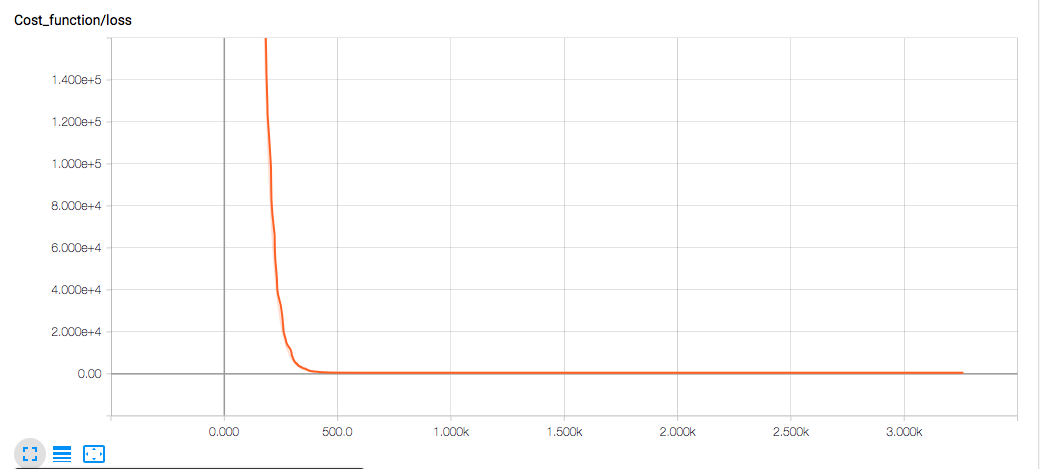

In [11]:
from IPython.display import Image
Image(filename='/Users/siddharthnayak/Desktop/Screen Shot 2018-03-19 at 1.53.08 AM.png')